# Distribution metrics

In this tutorial, we show how to extract the various components of a distribution metric and visualize them. 

**Note:** If your project has data in the last 1 hour for the pubsub metric for message sizes, then that will be used. Otherwise sample data will be loaded from a Google Cloud Storage bucket.

## Load the monitoring module and set the default project

If there is no default project set already, you must do so using 'set_datalab_project_id'.

In [1]:
from datalab.stackdriver import monitoring as gcm

# set_datalab_project_id('my-project-id')

In [2]:
METRIC_TYPE = 'pubsub.googleapis.com/topic/message_sizes'

In [3]:
%monitoring list metrics -t pubsub*

Metric type,Display name,Kind,Value,Unit,Labels
pubsub.googleapis.com/subscription/backlog_bytes,Backlog size,GAUGE,INT64,By,
pubsub.googleapis.com/subscription/byte_cost,Subscription cost,DELTA,INT64,By,"operation_type, response_code"
pubsub.googleapis.com/subscription/config_updates_count,Subscription updates,DELTA,INT64,1,"response_code, operation_type"
pubsub.googleapis.com/subscription/mod_ack_deadline_message_operation_count,ModifyAckDeadline operations,DELTA,INT64,1,response_code
pubsub.googleapis.com/subscription/mod_ack_deadline_request_count,ModifyAckDeadline requests,DELTA,INT64,1,"response_class, response_code"
pubsub.googleapis.com/subscription/num_outstanding_messages,Outstanding messages,GAUGE,INT64,1,
pubsub.googleapis.com/subscription/num_undelivered_messages,Undelivered messages,GAUGE,INT64,1,
pubsub.googleapis.com/subscription/oldest_unacked_message_age,Oldest message age,GAUGE,INT64,s,
pubsub.googleapis.com/subscription/pull_ack_message_operation_count,Acknowledge operations,DELTA,INT64,1,response_code
pubsub.googleapis.com/subscription/pull_ack_request_count,Acknowledge requests,DELTA,INT64,1,"response_class, response_code"


## Load timeseries data for the pubsub topic message size

In case the default project has no data, then sample data is load from a Google Cloud Storage bucket.

In [4]:
import StringIO
import json
import pandas 
import datalab.storage as storage

query = gcm.Query(METRIC_TYPE, hours=1)
df = query.as_dataframe(label='topic_id')

# If there is data, load some sample data from a GCS bucket
if df.empty:
  bucket_name = 'cloud-datalab-samples'
  topic_messages_data = 'stackdriver-monitoring/timeseries/topic-message-sizes-20161208.csv'
  
  # Load the CSV from the bucket, and intialize the dataframe using it.
  bucket_item = storage.Bucket(bucket_name).item(topic_messages_data)
  data_string = StringIO.StringIO(bucket_item.read_from())
  df = pandas.DataFrame.from_csv(data_string)
  df = df.applymap(lambda x: json.loads(x.replace('\'', '"'))
                   if isinstance(x, basestring) else x)
df.head()

,conductor_fast,conductor_fast_aws,conductor_initial,conductor_initial_aws,conductor_kicker,conductor_realtime,conductor_slow,conductor_slow_aws,conductor_status
2016-12-08 18:02:52.409,"{u'count': u'50850', u'bucketCounts': [u'0', u...","{u'count': u'4509', u'bucketCounts': [u'0', u'...",NaN,"{u'count': u'57', u'bucketCounts': [u'0', u'0'...","{u'count': u'472', u'bucketCounts': [u'0', u'0...","{u'count': u'501', u'bucketCounts': [u'0', u'0...","{u'count': u'77', u'bucketCounts': [u'0', u'0'...","{u'count': u'95', u'bucketCounts': [u'0', u'0'...","{u'count': u'56534', u'bucketCounts': [u'0', u..."
2016-12-08 18:03:52.409,"{u'count': u'51121', u'bucketCounts': [u'0', u...","{u'count': u'4549', u'bucketCounts': [u'0', u'...",NaN,{u'bucketOptions': {u'exponentialBuckets': {u'...,"{u'count': u'465', u'bucketCounts': [u'0', u'0...","{u'count': u'423', u'bucketCounts': [u'0', u'0...","{u'count': u'73', u'bucketCounts': [u'0', u'0'...","{u'count': u'87', u'bucketCounts': [u'0', u'0'...","{u'count': u'56265', u'bucketCounts': [u'0', u..."
2016-12-08 18:04:52.409,"{u'count': u'50852', u'bucketCounts': [u'0', u...","{u'count': u'4546', u'bucketCounts': [u'0', u'...",NaN,{u'bucketOptions': {u'exponentialBuckets': {u'...,"{u'count': u'584', u'bucketCounts': [u'0', u'0...","{u'count': u'540', u'bucketCounts': [u'0', u'0...","{u'count': u'73', u'bucketCounts': [u'0', u'0'...","{u'count': u'84', u'bucketCounts': [u'0', u'0'...","{u'count': u'56064', u'bucketCounts': [u'0', u..."
2016-12-08 18:05:52.409,"{u'count': u'51105', u'bucketCounts': [u'0', u...","{u'count': u'4421', u'bucketCounts': [u'0', u'...",NaN,{u'bucketOptions': {u'exponentialBuckets': {u'...,"{u'count': u'1191', u'bucketCounts': [u'0', u'...","{u'count': u'1188', u'bucketCounts': [u'0', u'...","{u'count': u'80', u'bucketCounts': [u'0', u'0'...","{u'count': u'81', u'bucketCounts': [u'0', u'0'...","{u'count': u'56705', u'bucketCounts': [u'0', u..."
2016-12-08 18:06:52.409,"{u'count': u'51318', u'bucketCounts': [u'0', u...","{u'count': u'4488', u'bucketCounts': [u'0', u'...",NaN,{u'bucketOptions': {u'exponentialBuckets': {u'...,"{u'count': u'1307', u'bucketCounts': [u'0', u'...","{u'count': u'1205', u'bucketCounts': [u'0', u'...","{u'count': u'63', u'bucketCounts': [u'0', u'0'...","{u'count': u'66', u'bucketCounts': [u'0', u'0'...","{u'count': u'56686', u'bucketCounts': [u'0', u..."


## Extract the distribution fields, and display them

We can use the `applymap` method to extract the distribution fields. The following fields are numeric, and can be displayed as standard linecharts / heatmaps:

* mean
* count
* sumOfSquaredDeviation

Lets see a single distribution below

In [5]:
single_distribution = df.iloc[0, 0]
single_distribution

{u'bucketCounts': [u'0',
  u'0',
  u'0',
  u'0',
  u'0',
  u'0',
  u'0',
  u'0',
  u'0',
  u'0',
  u'47304',
  u'3546'],
 u'bucketOptions': {u'exponentialBuckets': {u'growthFactor': 2,
   u'numFiniteBuckets': 32,
   u'scale': 1}},
 u'count': u'50850',
 u'mean': 933.3828435757302,
 u'sumOfSquaredDeviation': 99326089.09674126}

### Display the mean

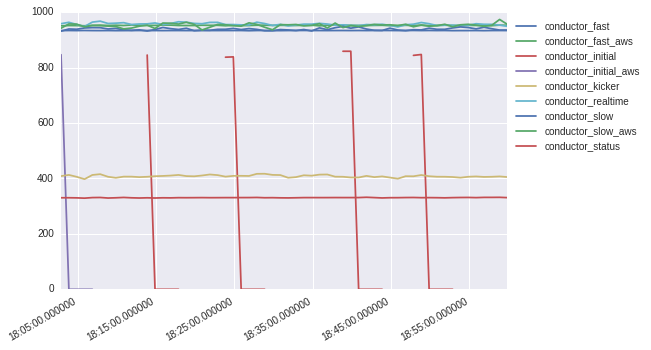

In [6]:
df_mean = df.applymap(lambda x: x.get('mean', 0) if isinstance(x, dict) else x)

# Display the data as a linechart
df_mean.plot().legend(loc="upper left", bbox_to_anchor=(1,1));

### Display the count

The count field is a string, so we need to cast it to an integer

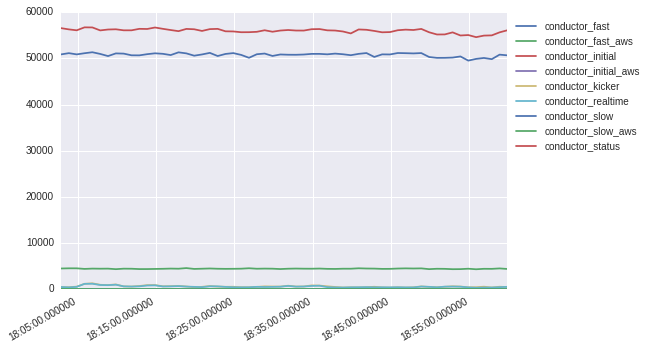

In [7]:
df_count = df.applymap(lambda x: int(x.get('count', 0)) if isinstance(x, dict) else x)

# Display the data as a linechart
df_count.plot().legend(loc="upper left", bbox_to_anchor=(1,1));

### Display the sum of square deviation

Extracting maximum value is similar

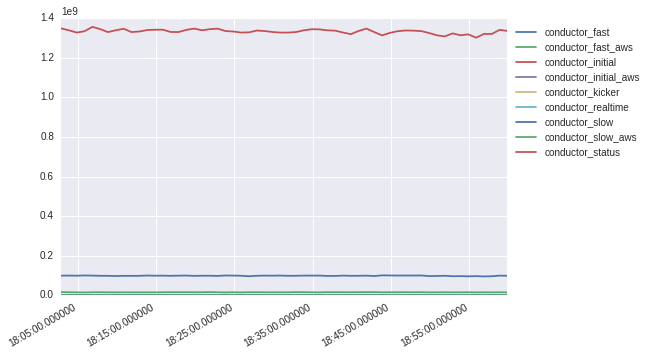

In [8]:
df_ssd = df.applymap(lambda x: x.get('sumOfSquaredDeviation', 0) if isinstance(x, dict) else x)

# Display the data as a linechart
df_ssd.plot().legend(loc="upper left", bbox_to_anchor=(1,1));

### Display values in a specific bucket

Here, we pick the values for a specific bucket from all distribution metric values. This shows you how the messages in a given size bucket changed over time.

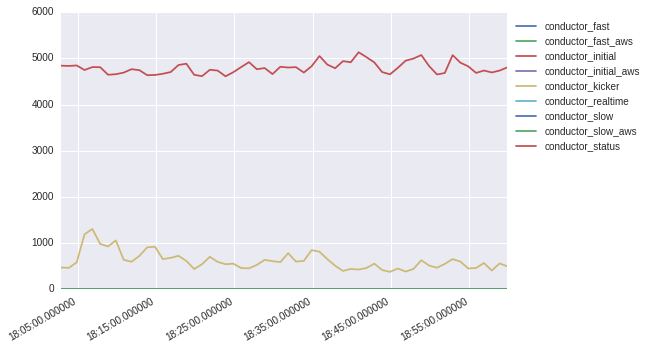

In [9]:
bucket_no = 9
df_single_bucket = df.applymap(lambda x: x.get('bucketCounts', []) if isinstance(x, dict) else [])
df_single_bucket = df_single_bucket.applymap(lambda x: float(x[bucket_no]) if len(x) > bucket_no else 0) 

# Display the data as a linechart
df_single_bucket.plot().legend(loc="upper left", bbox_to_anchor=(1,1));

### Display all bucket values for a specific timeseries

In order to display the size of all the buckets in a given timeseries, we create a new dataframe, where each column corresponds to a specific bucket.

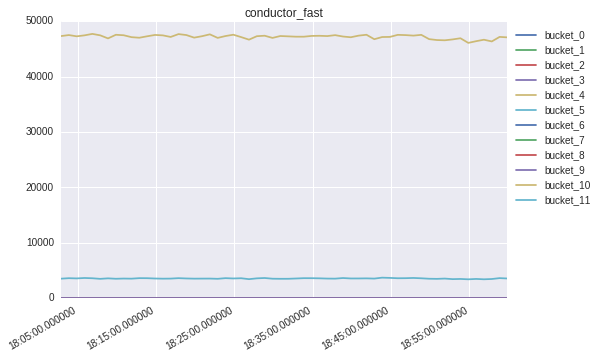

In [10]:
import pandas 

df_single_column = pandas.DataFrame(index=df.index)
column_name = df.columns[0]
series_col = df[column_name]

max_buckets = max(series_col.apply(lambda x: len(x.get('bucketCounts', [])) if isinstance(x, dict) else 0))

for i in xrange(max_buckets):
  series = series_col.apply(lambda x: x.get('bucketCounts', []) if isinstance(x, dict) else [])
  series = series.apply(lambda x: float(x[i]) if len(x) > i else 0) 
  df_single_column['bucket_%s' % i] = series

if not df_single_column.empty:
  df_single_column.plot(title=column_name).legend(loc="upper left", bbox_to_anchor=(1,1))

### Display a specific value as a histogram

Here we display the disbribution initialized earlier - `single_distribution`.

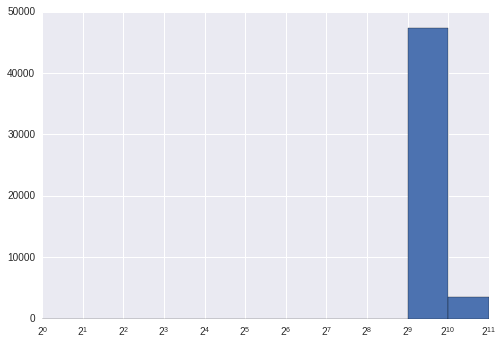

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the bucket values, and map to integers
bucket_values = map(int, single_distribution['bucketCounts'])

# Load the information about the bucket bins
bucket_options = single_distribution['bucketOptions']['exponentialBuckets']
scale = bucket_options['scale']
growth_factor = bucket_options['growthFactor']

# Set up the bucket bins and their widths.
num_values = len(bucket_values)
bucket_bins = [0] + [scale * (growth_factor ** i) for i in xrange(num_values)]
bucket_widths = [bucket_bins[i+1] - bucket_bins[i] for i in xrange(len(bucket_bins) - 1)]
bucket_bins = bucket_bins[:-1]

# Display values as a histogram
plt.bar(left=bucket_bins, height=bucket_values, width=bucket_widths)
plt.gca().set_xscale("log", basex=growth_factor)